In [1]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import statistics
%matplotlib inline
import matplotlib.pyplot as plt

# Project : Wrangle and Analyze Data

---

The tasks in this project are as follows:

- Data wrangling, which consists of:
    - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

## Gathering Data

---

In this part we will gather data with different methods :

 * Manually
 * Programatically through url
 * Programatically through Twitter's API : [Tweepy](https://www.tweepy.org/)

### Downloading a file manually

In [2]:
# Import twitter archive and check it visually
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df1.shape

(2356, 17)

### Downloading a file programatically using a url

In [4]:
# Downloading programatically the tweet image predictions file (tsv format)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# Saving the file and checking it visually
with open(url.split('/')[-1], 'wb') as file:
        file.write(response.content)
        
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Downloading a file programatically using an API

In [6]:
# Authentification :

consumer_key = 'ENTER YOUR ID HERE'
consumer_secret = 'ENTER YOUR PWD HERE'
access_token = 'ENTER YOUR TOKEN HERE'
access_secret = 'ENTER YOUR SECRET HERE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit_notify=True, wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser())

In [7]:
# Quering tweets info :
deleted_tweets = []
tweet_json = []
for tweet_id in df1.tweet_id:
    index = df1[df1['tweet_id']==tweet_id].index[0] #OK to use if there is no tweet id duplicates
    try:
        tweet = api.get_status(id=tweet_id , tweet_mode='extended')
        tweet_json.append(tweet)
    except tweepy.TweepError:
        deleted_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 739
Rate limit reached. Sleeping for: 737


In [8]:
tweet_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [9]:
# Creating the txt file
with open('tweet_json.txt', 'w') as outfile:
    json.dump(tweet_json, outfile)

In [10]:
# Loading the data from the txt file to a dataframe
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)

# We are interested in the tweet id, the retweet count and the favortie count
df3 = []
for i in range(len(data)):
    df3.append({'tweet_id': data[i]['id'], 
                'retweet_count': data[i]['retweet_count'], 
                'favorite_count': data[i]['favorite_count'],
                'retweeted': data[i]['retweeted'],
                'source' : data[i]['source'][data[i]['source'].find('rel="nofollow">') + 15:-4]
               })

df3 = pd.DataFrame(df3)

In [11]:
# Visual check and save as csv
df3.head()
df3.to_csv('API_data', index=False)

## Assessing Data

---

Assessing the data visually and programatically for both quality (reated to content) and tidiness (related to structure) issues.
The aim is to find at least 8 quality issues and two tidiness issues.

Also, at the end, our data should follow the basic [rules of tidiness](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) :
* Each variable forms a column.
* Each observation forms a row.
* Each type of observational unit forms a table.

In [12]:
# Import dataframes
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df3 = pd.read_csv('API_data')

#### `twitter-archive-enhanced` table

In [13]:
df1.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**We can notice one rating at 14 which is strange because maximum rating should be 13. This will need a further check with value_counts().**

**The source is also an information we can obtain from API in a cleaner version so we will probably keep the one from the API.**

In [14]:
df1.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


**We can notive some strange names like "a", "an" and "then". This will need further investigation.**

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**181 retweets to remove**

**timestamp to convert to date time format**

In [16]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

We will have to check the values different over 13 and see if a correction is needed in the upcoming part.

In [19]:
sum(df1['tweet_id'].duplicated())

0

#### `image-predictions` table

In [20]:
df2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
df2.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
sum(df2['tweet_id'].duplicated())

0

In [24]:
sum(df2['jpg_url'].duplicated())

66

Duplicates will need to be removed.

In [25]:
df3.head()

,favorite_count,retweet_count,retweeted,source,tweet_id
0,35278,7443,False,Twitter for iPhone,892420643555336193
1,30524,5530,False,Twitter for iPhone,892177421306343426
2,22955,3653,False,Twitter for iPhone,891815181378084864
3,38566,7616,False,Twitter for iPhone,891689557279858688
4,36835,8202,False,Twitter for iPhone,891327558926688256


### Cleaning Data

#### Quality issues

---
For all :
* Date columns to convert to time format instead of string and keep only the ones until August 1st 2017 (max date in image predictions).
* Only keep original tweets (no retweets).

###### `twitter-archive-enhanced` table
- Remove tweets with wrong names like "a", "an" and "the".
- Fix wrong denominator values (should be 10).
- Fix wrong numerator values (if needed after checking the tweet).
- Drop non relevant columns (not used or same information in other dataframes).

###### `image-predictions` table
- Drop image duplicates.
- Only keep valid prediction and the one with highest confidence level.
- Put all breed names in lower case.


#### Tidiness issues

---

* Melt doggo, floofer, pupper and puppo columns into one column.
* Tweet id should be string instead of floats (and same format in three tables).
* The only common column between the three dataframes should be the tweet id. --> Remove duplicated information between dfs
* Merge all tables into a master dataframe.

Let's start by quality issues and then tidiness issues.

In [26]:
# Make copies of dataframes to work with
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

#### Quality issues
For all :

**1. Only keep original tweets (no retweets).**


In [27]:
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

#Check
print(sum(df1_clean.retweeted_status_id.isnull()))
print(df1_clean.shape[0])

2175
2175


df1 only contains original tweets now.

**2. Date columns to convert to time format instead of string and keep only the ones until Augst 1st 2017 (max date in image predictions).**

In [28]:
df1_clean['timestamp']= pd.to_datetime(df1_clean['timestamp'])

#Check
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

Timestamp is in datetime format now.

In [29]:
df1_clean = df1_clean[(df1_clean['timestamp'] < '2017-08-01')]

#Check
df1_clean[(df1_clean['timestamp'] >= '2017-08-01')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
df1_clean[(df1_clean['timestamp'] < '2017-08-01')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


df1 only contains tweet written before August 1s 2017.
For df2 and df3 we will merge based on tweet id from df1. Which means that there will be no retweet and only ones with the good time stamps.

##### `twitter-archive-enhanced` table
**3. Fixe names.**

In [31]:
df1_clean = df1_clean.query('name != "a" & name != "an" & name != "the"')
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [32]:
#Check
df1_clean.query('name == "a" | name == "an" | name == "the"').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**4. Fix wrong denominator values (should be 10).**

In [33]:
df1_clean['rating_denominator'].value_counts()

10     2084
80        2
20        2
50        2
11        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [34]:
list = df1_clean['rating_denominator'].unique()
list = np.delete(list, np.where(list == 10))
list

array([  0,  15,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 130,
       110,  16, 120])

In [35]:
# Visual check of the tweets with bad values
i=0
for x in list :
    if i==0:
        temp_df = df1_clean.query('rating_denominator == @x')
    else :
        temp_df = temp_df.append(df1_clean.query('rating_denominator == @x'))
    i = i+1

with pd.option_context('max_colwidth', 200):
    display(temp_df[['tweet_id', 'text', 'rating_denominator']])

,tweet_id,text,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,832088576586297345,@docmisterio account started on 11/15/15,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",20


In [36]:
# We will keep all the ones having a valid id and drop the ones with invalid id. This was done visually as there was
# only 5 valid ratings

rating_list = temp_df.tweet_id
valid_rating_list = [835246439529840640, 740373189193256964, 682962037429899265, 722974582966214656, 716439118184652801]

for x in rating_list :
    if x in valid_rating_list :
        df1_clean.loc[(df1_clean.tweet_id == x), 'rating_denominator'] = 10
    else :
        df1_clean = df1_clean[df1_clean.tweet_id != x]
        
df1_clean.rating_denominator.value_counts()

10    2089
Name: rating_denominator, dtype: int64

**5. Fix wrong nominator values (if needed after checking the tweet).**

In [37]:
df1_clean['rating_numerator'].value_counts()

12      495
10      426
11      414
13      302
9       144
8        92
7        48
14       42
5        35
6        31
3        18
4        13
2         8
1         7
420       2
0         2
26        1
75        1
50        1
182       1
27        1
960       1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [38]:
# Get the list of invalid ones

list_1 = df1_clean['rating_numerator'].unique()
list = []
for x in list_1 :
    if x > 13 :
        list.append(x)
list

[14, 17, 420, 666, 182, 15, 960, 75, 27, 1776, 50, 26]

In [39]:
# Visual check of the tweets with bad values
i=0
for x in list :
    if i==0:
        temp_df = df1_clean.query('rating_numerator == @x')
    else :
        temp_df = temp_df.append(df1_clean.query('rating_numerator == @x'))
    i = i+1

with pd.option_context('max_colwidth', 200):
    display(temp_df[['tweet_id', 'text', 'rating_numerator']])

,tweet_id,text,rating_numerator
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14
35,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,14
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",14
64,879674319642796034,@RealKentMurphy 14/10 confirmed,14
76,878057613040115712,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,14
83,876537666061221889,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14
110,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14
117,870063196459192321,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,14
123,868880397819494401,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,14


It appears that there is another issue : some ratings have decimals but tis was no properly recorded on the numerator. Which means that :

* Nominator and denominator need to be floats
* We will have to reconsider all nominators (even below 13 that could have been decimal)
* We will have to find a way to find the ratings with decimals (regex)

In [40]:
df1_clean[['rating_numerator', 'rating_denominator']] = df1_clean[['rating_numerator','rating_denominator']].astype(float)
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 2 to 2355
Data columns (total 17 columns):
tweet_id                      2089 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2089 non-null datetime64[ns]
source                        2089 non-null object
text                          2089 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2034 non-null object
rating_numerator              2089 non-null float64
rating_denominator            2089 non-null float64
name                          2089 non-null object
doggo                         2089 non-null object
floofer                       2089 non-null object
pupper                        2089 non-null object
puppo                         2089 non-null object
dtypes: datetime64[ns](1),

In [41]:
with pd.option_context('max_colwidth', 200) :
    display(df1_clean[df1_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


We will keep the 4 last ones as they respect the rule (<13) on correct their values manually. We will drop the 13.5 as it exceeds 13.

In [42]:
df1_clean.loc[(df1_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df1_clean.loc[(df1_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df1_clean.loc[(df1_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df1_clean.loc[(df1_clean.tweet_id == 680494726643068929	), 'rating_numerator'] = 11.26

df1_clean = df1_clean[df1_clean.tweet_id != 883482846933004288]

In [43]:
# Check
with pd.option_context('max_colwidth', 200) :
    display(df1_clean[df1_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


Let's now check the values > 13

In [44]:
list_1 = df1_clean['rating_numerator'].unique()
list = []
for x in list_1 :
    if x > 13 :
        list.append(x)
list

[14.0, 17.0, 420.0, 666.0, 182.0, 15.0, 960.0, 1776.0, 50.0]

In [45]:
# Visual check of the tweets with bad values
i=0
for x in list :
    if i==0:
        temp_df = df1_clean.query('rating_numerator == @x')
    else :
        temp_df = temp_df.append(df1_clean.query('rating_numerator == @x'))
    i = i+1

with pd.option_context('max_colwidth', 200):
    display(temp_df[['tweet_id', 'text', 'rating_numerator']])

,tweet_id,text,rating_numerator
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14.0
35,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,14.0
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",14.0
64,879674319642796034,@RealKentMurphy 14/10 confirmed,14.0
76,878057613040115712,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,14.0
83,876537666061221889,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14.0
110,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14.0
117,870063196459192321,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,14.0
123,868880397819494401,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,14.0


We will drop all these lines as they intentionally exceed 13/10 apart from the last one 716439118184652801 where is is an 11/10 instead of 50.

In [46]:
df1_clean.loc[(df1_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11

#Check
df1_clean.loc[(df1_clean.tweet_id == 716439118184652801), 'rating_numerator']

1202    11.0
Name: rating_numerator, dtype: float64

In [47]:
id_list_to_drop = temp_df.tweet_id
len(id_list_to_drop)

51

In [48]:
id_list_to_drop = id_list_to_drop[id_list_to_drop != 716439118184652801]
len(id_list_to_drop)

50

In [49]:
for x in id_list_to_drop :
    df1_clean = df1_clean[df1_clean.tweet_id != x]

In [50]:
df1_clean.rating_numerator.value_counts()

12.00    495
10.00    426
11.00    415
13.00    302
9.00     144
8.00      92
7.00      48
5.00      33
6.00      31
3.00      18
4.00      13
2.00       8
1.00       7
0.00       2
11.26      1
9.75       1
9.50       1
11.27      1
Name: rating_numerator, dtype: int64

**6. Drop non relevant columns (not used or same information in other dataframes).**

In [51]:
df1_clean = df1_clean.drop(['source',
                            'in_reply_to_status_id',
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id', 
                            'retweeted_status_timestamp', 
                            'expanded_urls'], 1)

In [52]:
df1_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10.0,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,None


##### `image-predictions` table
**7. Drop image duplicates.**

In [53]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [54]:
df2_clean = df2_clean.drop_duplicates(subset=['jpg_url'])
df2_clean = df2_clean.reset_index(drop=True)

In [55]:
# Check
sum(df2_clean['jpg_url'].duplicated())

0

**8. Only keep valid prediction and the one with highest confidence level.**

In [56]:
predicted_breed=[]
confidence_level= []

for tweet in range(len(df2_clean.tweet_id)) :
    if df2_clean.iloc[tweet].p1_dog == True :
        predicted_breed.append(df2_clean.iloc[tweet].p1)
        confidence_level.append(df2_clean.iloc[tweet].p1_conf)
    elif df2_clean.iloc[tweet].p2_dog == True :
        predicted_breed.append(df2_clean.iloc[tweet].p2)
        confidence_level.append(df2_clean.iloc[tweet].p2_conf)
    elif df2_clean.iloc[tweet].p3_dog == True :
        predicted_breed.append(df2_clean.iloc[tweet].p3)
        confidence_level.append(df2_clean.iloc[tweet].p3_conf)
    else :
        predicted_breed.append('Not recognized')
        confidence_level.append('Error')

df2_clean['predicted_breed']=predicted_breed
df2_clean['confidence_level']=confidence_level

# Check
df2_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_breed,confidence_level
1485,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True,chow,0.0903414
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True,Labrador_retriever,0.999885
1865,857989990357356544,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,1,French_bulldog,0.432580,True,English_springer,0.325898,True,Lakeland_terrier,0.042618,True,French_bulldog,0.43258
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True,pug,0.841987
448,674690135443775488,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1,tick,0.242538,False,nail,0.212589,False,screw,0.172838,False,Not recognized,Error
1452,778748913645780993,https://pbs.twimg.com/media/Cs6r_-kVIAALh1p.jpg,1,Staffordshire_bullterrier,0.351434,True,boxer,0.201478,True,American_Staffordshire_terrier,0.142838,True,Staffordshire_bullterrier,0.351434
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False,Not recognized,Error
1949,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True,Labrador_retriever,0.0334961
489,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,cocker_spaniel,0.299708,True,golden_retriever,0.263665,True,Irish_setter,0.080323,True,cocker_spaniel,0.299708
1947,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True,vizsla,0.960513


In [57]:
# Drop non useful rows and columns
df2_clean = df2_clean.drop(['p1',
                            'p1_conf',
                            'p1_dog',
                            'p2',
                            'p2_conf',
                            'p2_dog',
                            'p3',
                            'p3_conf',
                            'p3_dog'], 1)

df2_clean = df2_clean[df2_clean['predicted_breed'] != 'Not recognized']

In [58]:
df2_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


**9. Put all breed names in lower case.**

In [59]:
df2_clean['predicted_breed'] = df2_clean['predicted_breed'].str.lower()

# Check
df2_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### Tidiness issues

**1.Melt doggo, floofer, pupper and puppo columns into one column.**

In [60]:
df1_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
317,834786237630337024,2017-02-23 15:25:23,This is Tobi. She is properly fetching her sho...,13.0,10.0,Tobi,None,None,None,None
1977,672988786805112832,2015-12-05 04:00:04,This is Schnozz. He's had a blurred tail since...,10.0,10.0,Schnozz,None,None,pupper,None
1970,673295268553605120,2015-12-06 00:17:55,Meet Eve. She's a raging alcoholic 8/10 (would...,8.0,10.0,Eve,None,None,pupper,None
673,789628658055020548,2016-10-22 00:45:17,This is Eli. He can fly. 13/10 magical af http...,13.0,10.0,Eli,None,None,None,None
2322,666430724426358785,2015-11-17 01:40:41,Oh boy what a pup! Sunglasses take this one to...,6.0,10.0,None,None,None,None,None
1915,674318007229923329,2015-12-08 20:01:55,This is Lennon. He's in quite the predicament....,8.0,10.0,Lennon,None,None,pupper,None
1762,678643457146150913,2015-12-20 18:29:43,Meet Grizz. He just arrived. Couldn't wait unt...,10.0,10.0,Grizz,None,None,None,None
2338,666104133288665088,2015-11-16 04:02:55,Not familiar with this breed. No tail (weird)....,1.0,10.0,None,None,None,None,None
2140,670003130994700288,2015-11-26 22:16:09,This is Raphael. He is a Baskerville Conquista...,10.0,10.0,Raphael,None,None,None,None
1419,698342080612007937,2016-02-13 03:05:01,This is Maximus. He's training for the tetherb...,11.0,10.0,Maximus,None,None,None,None


In [61]:
df1_clean2 = pd.melt(df1_clean, id_vars=['tweet_id', 'timestamp','text','rating_numerator','rating_denominator','name'],
                    var_name='dogs',
                    value_name='dogs_stage')

df1_clean2.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs,dogs_stage
3205,698262614669991936,2016-02-12 21:49:15,This is Franklin. He's a yoga master. Trying t...,11.0,10.0,Franklin,floofer,None
7779,673887867907739649,2015-12-07 15:32:42,When you're having a great time sleeping and y...,10.0,10.0,None,puppo,None
6797,758041019896193024,2016-07-26 20:47:17,Teagan reads entire books in store so they're ...,9.0,10.0,None,puppo,None
7599,679047485189439488,2015-12-21 21:15:11,This dog doesn't know how to stairs. Quite tra...,9.0,10.0,None,puppo,None
7641,677331501395156992,2015-12-17 03:36:28,Meet Humphrey. He's a Northern Polyp Viagra. O...,9.0,10.0,Humphrey,puppo,None
7473,684959798585110529,2016-01-07 04:48:36,This is Jerry. He's a neat dog. No legs (tragi...,5.0,10.0,Jerry,puppo,None
5430,685307451701334016,2016-01-08 03:50:03,Say hello to Petrick. He's an Altostratus Floo...,11.0,10.0,Petrick,pupper,None
2579,781661882474196992,2016-09-30 01:08:10,Who keeps sending in pictures without dogs in ...,5.0,10.0,None,floofer,None
3386,685663452032069632,2016-01-09 03:24:40,Meet Brooks. He's confused by the almighty bal...,12.0,10.0,Brooks,floofer,None
3472,681231109724700672,2015-12-27 21:52:07,I just love this pic. 11/10 this pupper is goi...,11.0,10.0,None,floofer,None


In [62]:
df1_clean2 = df1_clean2.drop('dogs', 1)
df1_clean2

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10.0,None,None
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None
5,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10.0,None,None
6,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None
7,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,None
8,889880896479866881,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,13.0,10.0,Bruno,None
9,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,None


In [63]:
df1_clean = df1_clean2.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')
df1_clean.dogs_stage.value_counts()

None       1715
pupper      222
doggo        67
puppo        24
floofer      10
Name: dogs_stage, dtype: int64

In [64]:
df1_clean.shape

(2038, 7)

**2. Tweet id should be string instead of floats (and same format in three tables).**

In [65]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].apply(str)
df2_clean['tweet_id'] = df2_clean['tweet_id'].apply(str)
df3_clean['tweet_id'] = df3_clean['tweet_id'].apply(str)

In [66]:
# Check
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1963 to 6123
Data columns (total 7 columns):
tweet_id              2038 non-null object
timestamp             2038 non-null datetime64[ns]
text                  2038 non-null object
rating_numerator      2038 non-null float64
rating_denominator    2038 non-null float64
name                  2038 non-null object
dogs_stage            2038 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 127.4+ KB


**3. The only common column between the three dataframes should be the tweet id. --> Remove duplicated information between dfs**

In [67]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stage'],
      dtype='object')

In [68]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'predicted_breed',
       'confidence_level'],
      dtype='object')

In [69]:
df3_clean.columns

Index(['favorite_count', 'retweet_count', 'retweeted', 'source', 'tweet_id'], dtype='object')

We can remove the retweeted column in df3 as we will later merge df1 and df3 based on df1's tweet id's where we already dropped the retweets.

We can remove img_num in df2.

In [70]:
df3_clean = df3_clean.drop('retweeted' , 1)

# Check
df3_clean.head()

,favorite_count,retweet_count,source,tweet_id
0,35278,7443,Twitter for iPhone,892420643555336193
1,30524,5530,Twitter for iPhone,892177421306343426
2,22955,3653,Twitter for iPhone,891815181378084864
3,38566,7616,Twitter for iPhone,891689557279858688
4,36835,8202,Twitter for iPhone,891327558926688256


In [71]:
df2_clean = df2_clean.drop('img_num' , 1)

# Check
df2_clean.head()

,tweet_id,jpg_url,predicted_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


**4. Merge all tables into a master dataframe.**

In [72]:
df1_clean.shape

(2038, 7)

In [73]:
df2_clean.shape

(1691, 4)

In [74]:
df3_clean.shape

(2331, 4)

In [75]:
twitter_archive_master = pd.merge(df1_clean, df2_clean, how='left', on='tweet_id')

# Check
print(twitter_archive_master.shape)
twitter_archive_master.head()

(2038, 10)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,predicted_breed,confidence_level
0,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424
1,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,None,NaN,NaN,NaN
2,667724302356258817,2015-11-20 15:20:54,What a dog to start the day with. Very calm. L...,7.0,10.0,None,None,NaN,NaN,NaN
3,667728196545200128,2015-11-20 15:36:22,Meet Olive. He comes to spot by tree to remini...,11.0,10.0,Olive,None,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,kuvasz,0.360159
4,667766675769573376,2015-11-20 18:09:16,This is Calvin. He is a Luxembourgian Mayo. Ha...,9.0,10.0,Calvin,None,NaN,NaN,NaN


In [76]:
twitter_archive_master = pd.merge(twitter_archive_master, df3_clean, how='left', on='tweet_id')

# Check
print(twitter_archive_master.shape)
twitter_archive_master.head()

(2038, 13)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,predicted_breed,confidence_level,favorite_count,retweet_count,source
0,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,315.0,115.0,Twitter Web Client
1,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,None,NaN,NaN,NaN,5368.0,2075.0,Twitter Web Client
2,667724302356258817,2015-11-20 15:20:54,What a dog to start the day with. Very calm. L...,7.0,10.0,None,None,NaN,NaN,NaN,444.0,291.0,Twitter Web Client
3,667728196545200128,2015-11-20 15:36:22,Meet Olive. He comes to spot by tree to remini...,11.0,10.0,Olive,None,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,kuvasz,0.360159,352.0,142.0,Twitter Web Client
4,667766675769573376,2015-11-20 18:09:16,This is Calvin. He is a Luxembourgian Mayo. Ha...,9.0,10.0,Calvin,None,NaN,NaN,NaN,407.0,201.0,Twitter Web Client


In [77]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2037
Data columns (total 13 columns):
tweet_id              2038 non-null object
timestamp             2038 non-null datetime64[ns]
text                  2038 non-null object
rating_numerator      2038 non-null float64
rating_denominator    2038 non-null float64
name                  2038 non-null object
dogs_stage            2038 non-null object
jpg_url               1594 non-null object
predicted_breed       1594 non-null object
confidence_level      1594 non-null object
favorite_count        2031 non-null float64
retweet_count         2031 non-null float64
source                2031 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 222.9+ KB


We need to drop null values now.

In [78]:
twitter_archive_master = twitter_archive_master[twitter_archive_master['jpg_url'].notnull()]
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 0 to 2037
Data columns (total 13 columns):
tweet_id              1594 non-null object
timestamp             1594 non-null datetime64[ns]
text                  1594 non-null object
rating_numerator      1594 non-null float64
rating_denominator    1594 non-null float64
name                  1594 non-null object
dogs_stage            1594 non-null object
jpg_url               1594 non-null object
predicted_breed       1594 non-null object
confidence_level      1594 non-null object
favorite_count        1587 non-null float64
retweet_count         1587 non-null float64
source                1587 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 174.3+ KB


In [79]:
twitter_archive_master[twitter_archive_master['favorite_count'].isnull()].head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,predicted_breed,confidence_level,favorite_count,retweet_count,source
128,872261713294495745,2017-06-07 01:19:32,This is Harry. His ears are activated one at a...,13.0,10.0,Harry,None,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,labrador_retriever,0.972019,NaN,NaN,NaN
930,680055455951884288,2015-12-24 16:00:30,"Meet Sammy. At first I was like ""that's a snow...",10.0,10.0,Sammy,None,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,samoyed,0.995466,NaN,NaN,NaN
1183,837366284874571778,2017-03-02 18:17:34,This is Lucy. She has a portrait of herself on...,13.0,10.0,Lucy,None,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,american_staffordshire_terrier,0.660085,NaN,NaN,NaN
1187,779123168116150273,2016-09-23 01:00:13,This is Reggie. He hugs everyone he meets. 12/...,12.0,10.0,Reggie,None,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,toy_poodle,0.43108,NaN,NaN,NaN
1628,844704788403113984,2017-03-23 00:18:10,This is Luna. It's her first time outside and ...,13.0,10.0,Luna,None,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,labrador_retriever,0.980213,NaN,NaN,NaN


In [80]:
twitter_archive_master = twitter_archive_master[twitter_archive_master['source'].notnull()]
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 2037
Data columns (total 13 columns):
tweet_id              1587 non-null object
timestamp             1587 non-null datetime64[ns]
text                  1587 non-null object
rating_numerator      1587 non-null float64
rating_denominator    1587 non-null float64
name                  1587 non-null object
dogs_stage            1587 non-null object
jpg_url               1587 non-null object
predicted_breed       1587 non-null object
confidence_level      1587 non-null object
favorite_count        1587 non-null float64
retweet_count         1587 non-null float64
source                1587 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 173.6+ KB


In [81]:
twitter_archive_master = twitter_archive_master.reset_index(drop=True)

In [82]:
# Storing the cleaned data and the master file.
df1_clean.to_csv('cleaned_twitter_archive_enhanced.csv', index=False)
df2_clean.to_csv('cleaned_image_predictions.csv', index=False)
df3_clean.to_csv('cleaned_API_data.csv', index=False)
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and visualizing the wrangled data

---

Now that our data is less messy and with better quality content, we will try to get some insights out of it through vizualisation and plotting.

In order to do that, we will try to answer the following questions :

* Which of the dogs stage gets the best rating ?
* Do tweets posted after work hours (in the evening) manage to get more likes ?
* Is there a correlation between retweets and the rating ?

**1. Which of the dogs stage gets the best rating ?**

In order the answer this question we need to remove all the rows with dogs_stage as "None" and then it sees like a bar plot would be the most suitable vizualisation to be able to answer the question and get some insight.

In [83]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,predicted_breed,confidence_level,favorite_count,retweet_count,source
0,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,315.0,115.0,Twitter Web Client
1,667728196545200128,2015-11-20 15:36:22,Meet Olive. He comes to spot by tree to remini...,11.0,10.0,Olive,None,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,kuvasz,0.360159,352.0,142.0,Twitter Web Client
2,667793409583771648,2015-11-20 19:55:30,Dogs only please. Small cows and other non can...,8.0,10.0,None,None,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,dalmatian,0.535073,650.0,307.0,Twitter for iPhone
3,667801013445750784,2015-11-20 20:25:43,OMIGOD 12/10 https://t.co/SVMF4Frf1w,12.0,10.0,None,None,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,flat-coated_retriever,0.508392,304.0,87.0,Twitter for iPhone
4,667806454573760512,2015-11-20 20:47:20,This is Filup. He is overcome with joy after f...,10.0,10.0,Filup,None,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,chihuahua,0.187155,987.0,449.0,Twitter for iPhone


In [84]:
dogs_stage_rating = df[df['dogs_stage'] != 'None']
dogs_stage_rating.dogs_stage.value_counts()

pupper     167
doggo       48
puppo       21
floofer      8
Name: dogs_stage, dtype: int64

In [85]:
print(statistics.stdev(dogs_stage_rating.query('dogs_stage == "pupper"').rating_numerator))
print(statistics.stdev(dogs_stage_rating.query('dogs_stage == "doggo"').rating_numerator))
print(statistics.stdev(dogs_stage_rating.query('dogs_stage == "puppo"').rating_numerator))
print(statistics.stdev(dogs_stage_rating.query('dogs_stage == "floofer"').rating_numerator))

1.3958160630195589
1.2742331861813823
1.2611408289624877
1.1259916264596033


In [86]:
pupper_mean = dogs_stage_rating.query('dogs_stage == "pupper"').rating_numerator.mean()
doggo_mean = dogs_stage_rating.query('dogs_stage == "doggo"').rating_numerator.mean()
puppo_mean = dogs_stage_rating.query('dogs_stage == "puppo"').rating_numerator.mean()
floofer_mean = dogs_stage_rating.query('dogs_stage == "floofer"').rating_numerator.mean()

In [87]:
print('pupper '+str(pupper_mean))
print('doggo '+str(doggo_mean))
print('puppo '+str(puppo_mean))
print('floofer '+str(floofer_mean))

pupper 10.815988024
doggo 11.6875
puppo 11.9047619048
floofer 11.875


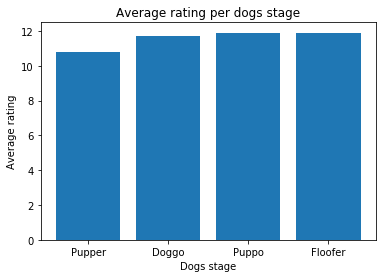

In [88]:
locations = [1, 2, 3, 4]
heights = [pupper_mean, doggo_mean, puppo_mean, floofer_mean]
labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average rating per dogs stage')
plt.xlabel('Dogs stage')
plt.ylabel('Average rating');

### Partial conclusion 1 :

The average ratings for dogs stages are pretty close to each other. The spread of each stage was calculated to check if it is better to use the mean or median. As the spread value is not very high, the mean was used. It appears that the ones classified as "Puppo" achieved the highest average ratings closely followed by "Floofer", then "Doggo" and "Pupper". It is a tight race as all averages lay in a range of 1 point. Finally we should question the average of "Floofer" as it was only calculated on a 3 ratings sample. To draw better conclusions it would be interesting to gather more data about "Floofer" and "Puppo" ratings.

**2. Do tweets posted after work hours (in the evening) manage to get more likes ?**

It would be interesting to check if tweets posted after work hours achieve more likes as there is possibly a higher audience. Here, the fact of formatting the timestamp as time date format will be helpful.

In [89]:
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [90]:
df['hour'] = df.index.hour

In [91]:
df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,predicted_breed,confidence_level,favorite_count,retweet_count,source,hour
timestamp,,,,,,,,,,,,,
2015-11-20 03:35:20,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,315.0,115.0,Twitter Web Client,3
2015-11-20 15:36:22,667728196545200128,Meet Olive. He comes to spot by tree to remini...,11.0,10.0,Olive,None,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,kuvasz,0.360159,352.0,142.0,Twitter Web Client,15
2015-11-20 19:55:30,667793409583771648,Dogs only please. Small cows and other non can...,8.0,10.0,None,None,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,dalmatian,0.535073,650.0,307.0,Twitter for iPhone,19
2015-11-20 20:25:43,667801013445750784,OMIGOD 12/10 https://t.co/SVMF4Frf1w,12.0,10.0,None,None,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,flat-coated_retriever,0.508392,304.0,87.0,Twitter for iPhone,20
2015-11-20 20:47:20,667806454573760512,This is Filup. He is overcome with joy after f...,10.0,10.0,Filup,None,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,chihuahua,0.187155,987.0,449.0,Twitter for iPhone,20


In [92]:
hours_values = df.hour.value_counts().sort_index()
hours_values

0     211
1     226
2     159
3     135
4      70
5      15
6       3
13      1
14      4
15     68
16    166
17    131
18     77
19     65
20     59
21     57
22     53
23     87
Name: hour, dtype: int64

In [93]:
hours = hours_values.index.tolist()
hours

[0, 1, 2, 3, 4, 5, 6, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [94]:
# Test for hour 1 :
hour1 = hours[1]
like_values1 = df[df['hour']==hour1].favorite_count
statistics.stdev(like_values1)

9704.521810887649

In [95]:
like_values1.mean()

7726.9070796460173

We need to use the median because the standard deviation is high compared to the mean.

In [96]:
like_values1.median()

4301.5

In [97]:
median_likes = []

for hour in hours :
    median_like = df[df['hour']==hour].favorite_count.median()
    median_likes.append(median_like)
    
median_likes

[7942.0,
 4301.5,
 2175.0,
 2345.0,
 2007.0,
 1829.0,
 5883.0,
 670.0,
 4415.0,
 5561.0,
 10237.0,
 6578.0,
 3288.0,
 5365.0,
 3438.0,
 3242.0,
 5940.0,
 5274.0]

In [98]:
a = [hours, median_likes]
a = np.array(a)
a = np.transpose(a)

In [99]:
df_hours = pd.DataFrame(a, columns =['hour', 'median_likes'])

In [100]:
df_hours.head(20)

,hour,median_likes
0,0.0,7942.0
1,1.0,4301.5
2,2.0,2175.0
3,3.0,2345.0
4,4.0,2007.0
5,5.0,1829.0
6,6.0,5883.0
7,13.0,670.0
8,14.0,4415.0
9,15.0,5561.0


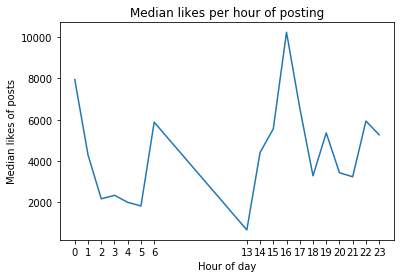

In [101]:
plt.plot(df_hours.hour, df_hours.median_likes);
plt.title('Median likes per hour of posting')
plt.xlabel('Hour of day')
plt.ylabel('Median likes of posts');
plt.xticks(df_hours.hour);

### Partial conclusion 2 :

It looks like 4pm seems to be the posting time that gets the more median likes (which is towards the end of the work days ?). 1pm seems to be the hour of the day with the least number of median likes.
We can also notice some peaks that we could link to everyday routine :
* Peak at 6 am (waking up/ breakfast)
* Peak at 7 pm (back from work / dinner time)
* 10pm to midinight (just before bedtime)
Of course, we are just seing some correlation here, therefore it does not imply causality. Some other parameters could be involved in the median number of like.

**3. Is there a correlation between retweets and the rating ?**

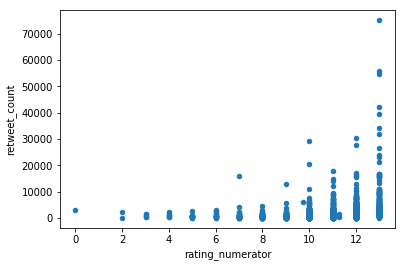

In [102]:
df.plot(y='retweet_count', x='rating_numerator', kind='scatter');

### Partial conclusion 3 :

It looks like there is a correlation between the number of retweets and the rating. It looks like an exponential correlation.